In [1]:
import numpy as np
import random as rn
import matplotlib.pylab as plt
from operator import itemgetter
import time
import sys

In [2]:
def gen_points(n, x, y):
    plist = []
    for i in range(n):
        plist.append([rn.randint(0,x), rn.randint(0,y)])
    return plist

In [3]:
num_data = 80
xmax = 100
ymax = 100

# random_points = gen_points(num_data, xmax, ymax)
random_points = [[1, 6], [2, 8], [3, 0], [5, 2], [7, 4]]

In [4]:
class Node():
    def __init__(self, axis, value, point=None, leftChild=None, rightChild=None):
        self.axis = axis                # Splitting Axis
        self.value = value              # Median Value
        self.point = point              # Holds a point if left/right are null
        self.left = leftChild           # Left subtree
        self.right = rightChild          # Right subtree

In [5]:
def kdtree(points, depth=0):
    if not points:
        return None
    
    k = len(points[0])
    axis = np.mod(depth, k)

    points.sort(key=itemgetter(axis))
    median = len(points) // 2
    value = points[median][axis]
    if np.mod(len(points), 2) == 0 or len(points) == 1:
        median = len(points) // 2
    else:
        median = (len(points)//2) + 1
    # print(len(points), median)

    if len(points[:median])==0 and len(points[median+1:])==0:
        # print(axis, points[median][axis], points[median])
        return Node(axis, value, leftChild=None, rightChild=None, point=points[median])
    else:
        return Node(axis, value, leftChild=kdtree(points[:median], depth+1), rightChild=kdtree(points[median:], depth+1), point=None)

In [6]:
root = kdtree(random_points)

In [7]:
refPoint = random_points[-1]
refDist = 1e1000

In [8]:
# Query Point
query = [7, 4]

In [9]:
def distance(A, B):
    return np.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)

In [10]:
def bruteForce(q, random_points):
    distVec = []
    for i in range(len(random_points)):
        distVec.append(distance(q, random_points[i]))
    minDistInd = distVec.index(np.min(distVec))
    return distVec[minDistInd], random_points[minDistInd]

In [11]:
def NNS(q, n, p, w):
    # q: Query Point (Point of Interest)
    # n: kd tree
    # p: Reference Point
    # w: Reference Distance
    if n.left is None and n.right is None:
        dist = distance(q, n.point)
        if dist < w:
            w = dist
            p = n.point
        return w, p
    else:
        if q[n.axis] <= n.value:
            search_left = True
        else:
            search_left = False
        

        if search_left:
            return NNS(q, n.left, p, w)
            # if q[n.axis]-refDist <= n.value:
            #     return NNS(q, n.left, p, w)
            # else:
            #     return NNS(q, n.right, p, w)
        else:
            return NNS(q, n.right, p, w)
            # if q[n.axis]-refDist > n.value:
            #     return NNS(q, n.right, p, w)
            # else:
            #     return NNS(q, n.left, p, w)

nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
print(nearDist, nearPoint)

2.8284271247461903 [5, 2]


In [12]:
start = time.time()
nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
print(nearDist, nearPoint)

# Brute Force
nearDist_BF, nearPoint_BF = bruteForce(query, random_points)
print(bruteForce(query, random_points))

print(distance(nearPoint, query), distance(nearPoint_BF, query))

2.8284271247461903 [5, 2]
(0.0, [7, 4])
2.8284271247461903 0.0


(0.7, 9.5, -0.4, 8.4)

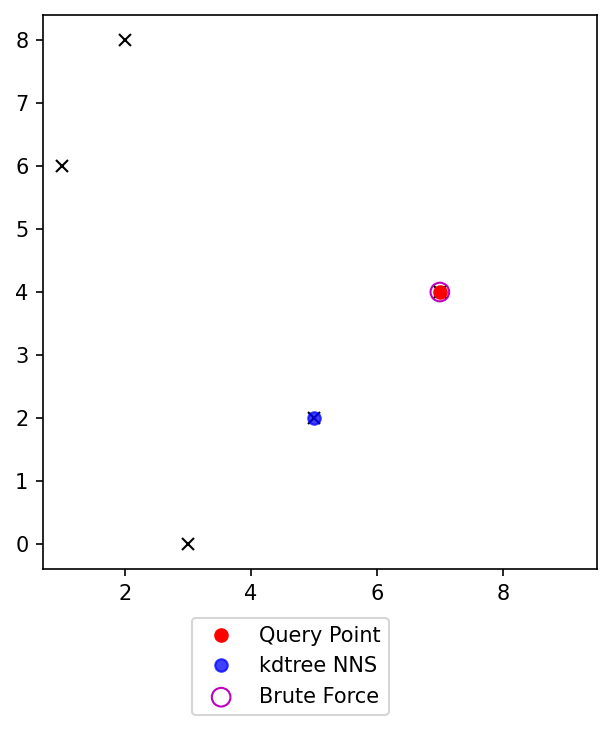

In [13]:
fig = plt.figure(dpi=150)
for rpi in random_points:
    plt.plot(rpi[0], rpi[1], 'kx')
plt.plot(query[0], query[1], 'or', label="Query Point")
plt.plot(nearPoint[0], nearPoint[1], 'ob', alpha=0.75, label="kdtree NNS")
plt.scatter(nearPoint_BF[0], nearPoint_BF[1], s=80, facecolors='none', edgecolors='m', label="Brute Force")
plt.legend(loc='center left', bbox_to_anchor=(0.25, -.175))
plt.axis('square')

In [14]:
afdasdfaf

NameError: name 'afdasdfaf' is not defined

In [ ]:
nSampleList = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 1e2, 5e2, 1e3, 5e3, 1e4]
compTimeDict_NNS = {}
compTimeDict_BF = {}
for i in range(len(nSampleList)):
    currSampleNumber = nSampleList[i]
    xmax = 1000
    ymax = 1000
    random_points = gen_points(int(currSampleNumber), xmax, ymax)

    compTimeDict_NNS[str(i)] = []
    compTimeDict_BF[str(i)] = []
    for j in range(1000):
        print(str(currSampleNumber)+', '+str(j))
        start=time.time()
        nearDist, nearPoint = NNS(q=query, n=root, p=refPoint, w=refDist)
        compTimeDict_NNS[str(i)].append(time.time()-start)

        start=time.time()
        nearDist, nearPoint = bruteForce(q=query, random_points=random_points)
        compTimeDict_BF[str(i)].append(time.time()-start)

5, 0
5, 1
5, 2
5, 3
5, 4
5, 5
5, 6
5, 7
5, 8
5, 9
5, 10
5, 11
5, 12
5, 13
5, 14
5, 15
5, 16
5, 17
5, 18
5, 19
5, 20
5, 21
5, 22
5, 23
5, 24
5, 25
5, 26
5, 27
5, 28
5, 29
5, 30
5, 31
5, 32
5, 33
5, 34
5, 35
5, 36
5, 37
5, 38
5, 39
5, 40
5, 41
5, 42
5, 43
5, 44
5, 45
5, 46
5, 47
5, 48
5, 49
5, 50
5, 51
5, 52
5, 53
5, 54
5, 55
5, 56
5, 57
5, 58
5, 59
5, 60
5, 61
5, 62
5, 63
5, 64
5, 65
5, 66
5, 67
5, 68
5, 69
5, 70
5, 71
5, 72
5, 73
5, 74
5, 75
5, 76
5, 77
5, 78
5, 79
5, 80
5, 81
5, 82
5, 83
5, 84
5, 85
5, 86
5, 87
5, 88
5, 89
5, 90
5, 91
5, 92
5, 93
5, 94
5, 95
5, 96
5, 97
5, 98
5, 99
5, 100
5, 101
5, 102
5, 103
5, 104
5, 105
5, 106
5, 107
5, 108
5, 109
5, 110
5, 111
5, 112
5, 113
5, 114
5, 115
5, 116
5, 117
5, 118
5, 119
5, 120
5, 121
5, 122
5, 123
5, 124
5, 125
5, 126
5, 127
5, 128
5, 129
5, 130
5, 131
5, 132
5, 133
5, 134
5, 135
5, 136
5, 137
5, 138
5, 139
5, 140
5, 141
5, 142
5, 143
5, 144
5, 145
5, 146
5, 147
5, 148
5, 149
5, 150
5, 151
5, 152
5, 153
5, 154
5, 155
5, 156
5, 157
5, 1

In [ ]:
compTimeNNS_List = []
compTimeBF_List = []
for i in range(len(nSampleList)):
    compTimeNNS_List.append(np.average(compTimeDict_NNS[str(i)]))
    compTimeBF_List.append(np.average(compTimeDict_BF[str(i)]))

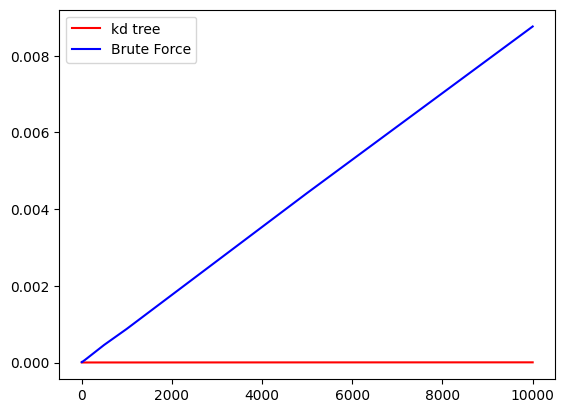

In [ ]:
fig = plt.figure()
plt.plot(nSampleList, compTimeNNS_List, '-r', label='kd tree')
plt.plot(nSampleList, compTimeBF_List, '-b', label='Brute Force')
plt.legend()

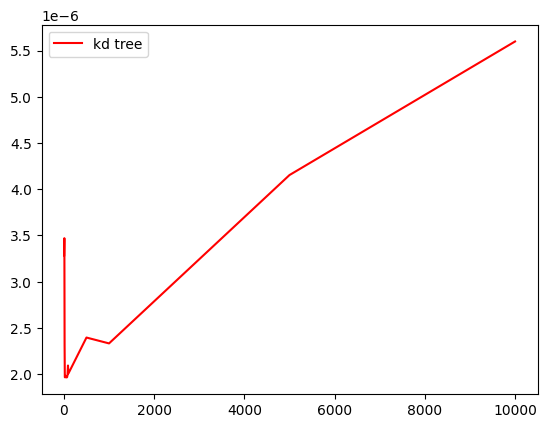

In [ ]:
fig = plt.figure()
plt.plot(nSampleList, compTimeNNS_List, '-r', label='kd tree')
# plt.plot(nSampleList, 1e-6*np.log2(nSampleList), '-b', label='log2')
plt.legend()